In [1]:
#Importing MNIST data using tensorflow. Should get 60,000 training examples and 10,000 test examples
import tensorflow as tf 
import numpy as np
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
#let's take a look at one of the training examples:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

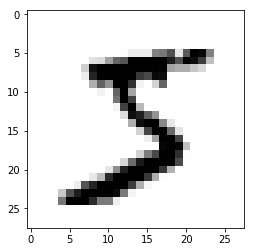

In [17]:
import matplotlib.pyplot as plt
#let's atke a look at one of the training examples plotted
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

In [4]:
#normalizing and flattening vectors
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# normalizing the data to help with the training
X_train_flat_norm = X_train_flat / 255
X_test_flat_norm = X_test_flat / 255

print("X_train_flat_norm shape", X_train_flat_norm.shape)
print("X_test_flat_norm shape", X_test_flat_norm.shape)


X_train_flat_norm shape (60000, 784)
X_test_flat_norm shape (10000, 784)


In [5]:
#looking at first training example
print(X_train_flat_norm[0])
print('\nX_train_flat_norm shape', X_train_flat_norm[0].shape)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [6]:
from keras.utils import np_utils
#one hot encoding y values
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train_hot = np_utils.to_categorical(y_train, n_classes)
y_test_hot = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train_hot.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


Using TensorFlow backend.


In [13]:
#building and compiling model using Keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

#compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# training the model and saving metrics in history
history = model.fit(X_train_flat_norm, y_train_hot, 
                    epochs=3, 
                    batch_size=100)


Epoch 1/3
60000/60000 [==============================] - 2s 41us/step - loss: 0.2977 - acc: 0.9143
Epoch 2/3
60000/60000 [==============================] - 2s 37us/step - loss: 0.1154 - acc: 0.9657
Epoch 3/3
60000/60000 [==============================] - 2s 37us/step - loss: 0.0805 - acc: 0.9745


In [15]:
#testing accuracy on test set
val_loss, val_acc = model.evaluate(X_test_flat_norm, y_test_hot)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 0s 38us/step
0.08690670852437615
0.9728
